In [0]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt   
import plotly.express as px       
import plotly.offline as py       
import seaborn as sns             
import plotly.graph_objects as go 

from IPython.display import display

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [0]:
# if you are running this on Google Colab then use this cell for data loading.
'''
from google.colab import files

uploaded = files.upload()

import io
covid_cases = pd.read_csv (io.BytesIO(uploaded['covid_19_data.csv']))
train_df = pd.read_csv (io.BytesIO(uploaded['train.csv']))
test_df = pd.read_csv (io.BytesIO(uploaded['test.csv']))

'''

In [0]:
# if you are running this on your local machine / PC then use this cell for data loading.
covid_cases = pd.read_csv('covid_19_data.csv')
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')


In [0]:
# if you are running this on Kaggle's Kernel then use this cell for data loading.

'''
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


train_df = pd.read_csv ('/kaggle/input/covid19-global-forecasting-week-4/train.csv')
test_df = pd.read_csv ('/kaggle/input/covid19-global-forecasting-week-4/test.csv')

'''

In [0]:
display(covid_cases.info())
display(covid_cases.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15769 entries, 0 to 15768
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SNo              15769 non-null  int64  
 1   ObservationDate  15769 non-null  object 
 2   Province/State   7940 non-null   object 
 3   Country/Region   15769 non-null  object 
 4   Last Update      15769 non-null  object 
 5   Confirmed        15769 non-null  float64
 6   Deaths           15769 non-null  float64
 7   Recovered        15769 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 985.7+ KB


None

,SNo,Confirmed,Deaths,Recovered
count,15769.000000,15769.000000,15769.000000,15769.000000
mean,7885.000000,2245.313336,121.459953,549.170271
std,4552.262533,11977.674574,1001.354370,4386.890810
min,1.000000,0.000000,0.000000,0.000000
25%,3943.000000,7.000000,0.000000,0.000000
50%,7885.000000,76.000000,1.000000,1.000000
75%,11827.000000,525.000000,6.000000,43.000000
max,15769.000000,223691.000000,22170.000000,77000.000000


In [0]:
#Groping the same cities and countries together along with their successive dates.

country_list = covid_cases['Country/Region'].unique()

country_grouped_covid = covid_cases[0:1]

for country in country_list:
    test_data = covid_cases['Country/Region'] == country   
    test_data = covid_cases[test_data]
    country_grouped_covid = pd.concat([country_grouped_covid, test_data], axis=0)
    
country_grouped_covid.reset_index(drop=True)
country_grouped_covid.head()

#Dropping of the column Last Update
country_grouped_covid.drop('Last Update', axis=1, inplace=True)

#Replacing NaN Values in Province/State with a string "Not Reported"
country_grouped_covid['Province/State'].replace(np.nan, "Not Reported", inplace=True)

#Printing the dataset
print(country_grouped_covid.head())
#country_grouped_covid holds the dataset for the country


#Creating a dataset to analyze the cases country wise - As of 04/10/2020

latest_data = country_grouped_covid['ObservationDate'] == '04/10/2020'
country_data = country_grouped_covid[latest_data]

#The total number of reported Countries
country_list = country_data['Country/Region'].unique()
print("The total number of countries with COVID-19 Confirmed cases = {}".format(country_list.size))



   SNo ObservationDate Province/State  ... Confirmed  Deaths  Recovered
0    1      01/22/2020          Anhui  ...       1.0     0.0        0.0
0    1      01/22/2020          Anhui  ...       1.0     0.0        0.0
1    2      01/22/2020        Beijing  ...      14.0     0.0        0.0
2    3      01/22/2020      Chongqing  ...       6.0     0.0        0.0
3    4      01/22/2020         Fujian  ...       1.0     0.0        0.0

[5 rows x 7 columns]
The total number of countries with COVID-19 Confirmed cases = 187


In [0]:
#Plotting a bar graph for confirmed cases vs deaths due to COVID-19 in World.

unique_dates = country_grouped_covid['ObservationDate'].unique()
confirmed_cases = []
recovered = []
deaths = []

for date in unique_dates:
    date_wise = country_grouped_covid['ObservationDate'] == date  
    test_data = country_grouped_covid[date_wise]
    
    confirmed_cases.append(test_data['Confirmed'].sum())
    deaths.append(test_data['Deaths'].sum())
    recovered.append(test_data['Recovered'].sum())
    
#Converting the lists to a pandas dataframe.

country_dataset = {'Date' : unique_dates, 'Confirmed' : confirmed_cases, 'Recovered' : recovered, 'Deaths' : deaths}
country_dataset = pd.DataFrame(country_dataset)


In [0]:
#Plotting the Graph of Cases vs Deaths Globally.

fig = go.Figure()
fig.add_trace(go.Bar(x=country_dataset['Date'], y=country_dataset['Confirmed'], name='Confirmed Cases of COVID-19', marker_color='rgb(55, 83, 109)'))
fig.add_trace(go.Bar(x=country_dataset['Date'],y=country_dataset['Deaths'],name='Total Deaths because of COVID-19',marker_color='rgb(26, 118, 255)'))

fig.update_layout(title='Confirmed Cases and Deaths from COVID-19',xaxis_tickfont_size=14,
                  yaxis=dict(title='Reported Numbers',titlefont_size=16,tickfont_size=14,),
    legend=dict(x=0,y=1.0,bgcolor='rgba(255, 255, 255, 0)',bordercolor='rgba(255, 255, 255, 0)'),barmode='group',bargap=0.15, bargroupgap=0.1)
fig.show()

In [0]:
#Plotting the Graph of Cases vs Recoveries Globally.
fig = go.Figure()
fig.add_trace(go.Bar(x=country_dataset['Date'], y=country_dataset['Confirmed'], name='Confirmed Cases of COVID-19', marker_color='rgb(55, 83, 109)'))
fig.add_trace(go.Bar(x=country_dataset['Date'],y=country_dataset['Recovered'],name='Total Recoveries because of COVID-19',marker_color='rgb(26, 118, 255)'))

fig.update_layout(title='Confirmed Cases and Recoveries from COVID-19',xaxis_tickfont_size=14,
                  yaxis=dict(title='Reported Numbers',titlefont_size=16,tickfont_size=14,),
    legend=dict(x=0,y=1.0,bgcolor='rgba(255, 255, 255, 0)',bordercolor='rgba(255, 255, 255, 0)'),
    barmode='group',bargap=0.15, bargroupgap=0.1)
fig.show()

In [0]:
# EDA on covid19-global-forecasting-week-4

train = pd.read_csv ('train.csv')
test = pd.read_csv ('test.csv')

train['country_province'] = train['Country_Region'].fillna('') + '/' + train['Province_State'].fillna('')
test['country_province'] = test['Country_Region'].fillna('') + '/' + test['Province_State'].fillna('')

from IPython.display import display

ww_df = train.groupby('Date')[['ConfirmedCases', 'Fatalities']].sum().reset_index()
ww_df['new_case'] = ww_df['ConfirmedCases'] - ww_df['ConfirmedCases'].shift(1)
display(ww_df.tail())

ww_melt_df = pd.melt(ww_df, id_vars=['Date'], value_vars=['ConfirmedCases', 'Fatalities', 'new_case'])
ww_melt_df

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML

# --- plotly ---
from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

In [0]:
fig = px.line(ww_melt_df, x="Date", y="value", color='variable', title="Worldwide Confirmed/Death Cases Over Time")
fig.show()

In [0]:
fig = px.line(ww_melt_df, x="Date", y="value" , color='variable' , title="Worldwide Confirmed/Death Cases Over Time (Log scale)" , log_y=True)
fig.show()

In [0]:
ww_df['mortality'] = ww_df['Fatalities'] / ww_df['ConfirmedCases']
fig = px.line(ww_df, x="Date", y="mortality",  title="Worldwide Mortality Rate Over Time")
fig.show()

In [0]:
display(train_df.info())
display(train_df.describe())

display(test_df.info())
display(train_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26292 entries, 0 to 26291
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              26292 non-null  int64 
 1   Province_State  11172 non-null  object
 2   Country_Region  26292 non-null  object
 3   Date            26292 non-null  object
 4   ConfirmedCases  26292 non-null  int64 
 5   Fatalities      26292 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1.2+ MB


None

,Id,ConfirmedCases,Fatalities
count,26292.000000,26292.000000,26292.000000
mean,17826.500000,1186.183896,62.265594
std,10300.678012,8549.128727,695.049077
min,1.000000,0.000000,0.000000
25%,8913.750000,0.000000,0.000000
50%,17826.500000,1.000000,0.000000
75%,26739.250000,117.000000,1.000000
max,35652.000000,203020.000000,21067.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13459 entries, 0 to 13458
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ForecastId      13459 non-null  int64 
 1   Province_State  5719 non-null   object
 2   Country_Region  13459 non-null  object
 3   Date            13459 non-null  object
dtypes: int64(1), object(3)
memory usage: 420.7+ KB


None

,Id,ConfirmedCases,Fatalities
count,26292.000000,26292.000000,26292.000000
mean,17826.500000,1186.183896,62.265594
std,10300.678012,8549.128727,695.049077
min,1.000000,0.000000,0.000000
25%,8913.750000,0.000000,0.000000
50%,17826.500000,1.000000,0.000000
75%,26739.250000,117.000000,1.000000
max,35652.000000,203020.000000,21067.000000


In [0]:
#Checking for the null values in dataset
display(train_df.isnull().sum())
display(test_df.isnull().sum())

#Filling the values
train_df['Province_State'].fillna("",inplace = True)
test_df['Province_State'].fillna("",inplace = True)

Id                    0
Province_State    15120
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

ForecastId           0
Province_State    7740
Country_Region       0
Date                 0
dtype: int64

In [0]:
#Merging the columns together

train_df['Country_Region'] = train_df['Country_Region'] + ' ' + train_df['Province_State']
test_df['Country_Region'] = test_df['Country_Region'] + ' ' + test_df['Province_State']
del train_df['Province_State']
del test_df['Province_State']


In [0]:
#Creating a function to split-date

def split_date(date):
    date = date.split('-')
    date[0] = int(date[0])
    if(date[1][0] == '0'):
        date[1] = int(date[1][1])
    else:
        date[1] = int(date[1])
    if(date[2][0] == '0'):
        date[2] = int(date[2][1])
    else:
        date[2] = int(date[2])    
    return date

    
train_df.Date = train_df.Date.apply(split_date)
test_df.Date = test_df.Date.apply(split_date)

In [0]:
#Manipulation of columns for both training dataset

year = []
month = []
day = []
for i in train_df.Date:
    year.append(i[0])
    month.append(i[1])
    day.append(i[2])


train_df['Year'] = year
train_df['Month'] = month
train_df['Day'] = day
del train_df['Date']

In [0]:
#Manipulation of columns for both testing dataset



year = []
month = []
day = []
for i in test_df.Date:
    year.append(i[0])
    month.append(i[1])
    day.append(i[2])


test_df['Year'] = year
test_df['Month'] = month
test_df['Day'] = day
del test_df['Date']
del train_df['Id']
del test_df['ForecastId']
del train_df['Year']
del test_df['Year']


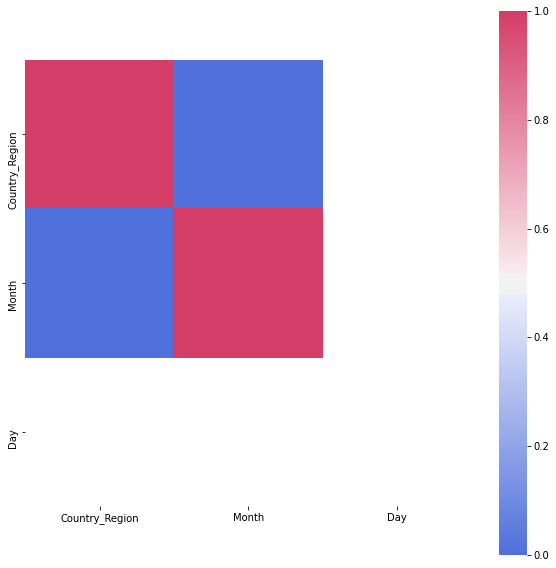

In [0]:

train_df['ConfirmedCases'] = train_df['ConfirmedCases'].apply(int)
train_df['Fatalities'] = train_df['Fatalities'].apply(int)
cases = train_df.ConfirmedCases
fatalities = train_df.Fatalities
del train_df['ConfirmedCases']
del train_df['Fatalities']

from sklearn.preprocessing import LabelEncoder , MinMaxScaler

lb = LabelEncoder()
train_df['Country_Region'] = lb.fit_transform(train_df['Country_Region'])
test_df['Country_Region'] = lb.transform(test_df['Country_Region'])
plt.figure(figsize = (10,10))
corr = train_df.corr()
sns.heatmap(corr , mask=np.zeros_like(corr, dtype=np.bool) , cmap=sns.diverging_palette(-100,0,as_cmap=True) , square = True)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(train_df.values)
x_test = scaler.transform(test_df.values)

In [0]:
# Running the XGBRegressor Algorithm

from xgboost import XGBRegressor

rf = XGBRegressor(n_estimators = 1500 , max_depth = 15, learning_rate=0.1 , randomstate = 0 , verbosity=2)
rf.fit(x_train,cases)
cases_pred = rf.predict(x_test)

rf = XGBRegressor(n_estimators = 1500 , max_depth = 15, learning_rate=0.1 , randomstate = 0 , verbosity=2)
rf.fit(x_train,fatalities)
fatalities_pred = rf.predict(x_test)

[14:15:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:15:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1338 extra nodes, 0 pruned nodes, max_depth=15
[14:15:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1346 extra nodes, 0 pruned nodes, max_depth=15
[14:15:01] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1342 extra nodes, 0 pruned nodes, max_depth=15
[14:15:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1362 extra nodes, 0 pruned nodes, max_depth=15
[14:15:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1384 extra nodes, 0 pruned nodes, max_depth=15
[14:15:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 1392 extra nodes, 0 pruned nodes, max_depth=15
[14:15:02] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roo

In [0]:
#Rouding off the prediction values and converting negatives to zero
cases_pred = np.around(cases_pred)
fatalities_pred = np.around(fatalities_pred)

cases_pred[cases_pred < 0] = 0
fatalities_pred[fatalities_pred < 0] = 0


In [0]:

#Importing the dataset for generating output
forecasted_dataset = pd.read_csv("submission.csv")

#Adding results to the dataset
forecasted_dataset['ConfirmedCases'] = cases_pred
forecasted_dataset['Fatalities'] = fatalities_pred
forecasted_dataset.to_csv("output.csv" , index = False)